In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [3]:
df_cookies=pd.read_csv("Data/cookies.csv")

In [4]:
df_cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [5]:
df_cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [6]:
df_cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [40]:
(0.15*4)+0.53

1.13

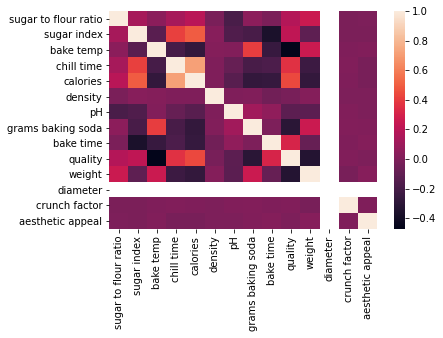

In [7]:
corr = df_cookies.corr()
ax = sns.heatmap(corr)

<AxesSubplot:xlabel='calories', ylabel='chill time'>

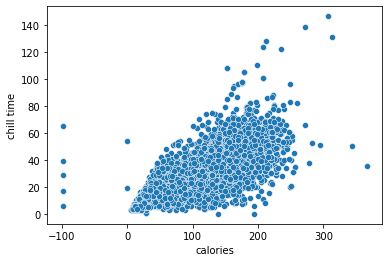

In [8]:
sns.scatterplot(data=df_cookies, x="calories", y="chill time")

In [9]:
df_cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

In [10]:
#encode mixins, and do something with the 2 missing vlaues:
df_cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [11]:
df_cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [20]:
num_columns=df_cookies.select_dtypes(include=["int64", "float64"]).columns
len(num_columns)

14

In [21]:
num_columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'weight', 'diameter', 'crunch factor', 'aesthetic appeal'],
      dtype='object')

<AxesSubplot:xlabel='calories', ylabel='Count'>

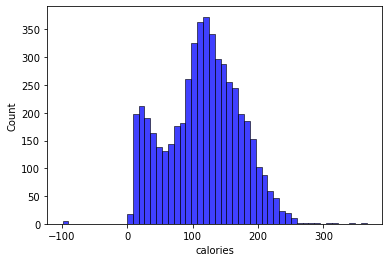

In [33]:


sns.histplot( df_cookies["calories"], color="blue")


In [43]:
df_sugar_index_fixed=df_cookies.drop(df_cookies[df_cookies["sugar index"]>25].index)
df_sugar_index_fixed

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,peanut butter,1.36,3
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,raisins,1.80,3
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,"chocolate, oats",1.07,3
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,chocolate,1.77,3


<AxesSubplot:xlabel='sugar index', ylabel='Count'>

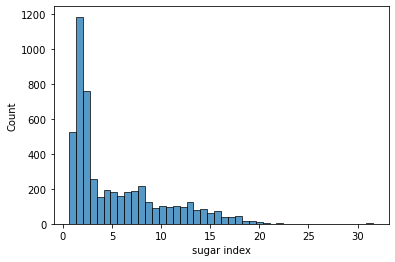

In [44]:
sns.histplot( df_cookies["sugar index"])

<AxesSubplot:xlabel='sugar index', ylabel='Count'>

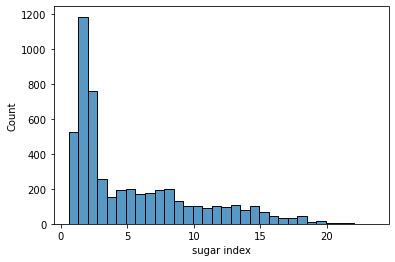

In [45]:
sns.histplot( df_sugar_index_fixed["sugar index"])


<AxesSubplot:xlabel='grams baking soda', ylabel='Count'>

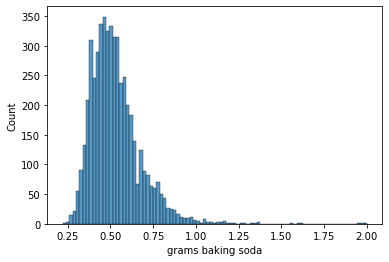

In [35]:
sns.histplot( df_cookies["grams baking soda"])


<AxesSubplot:xlabel='calories', ylabel='Count'>

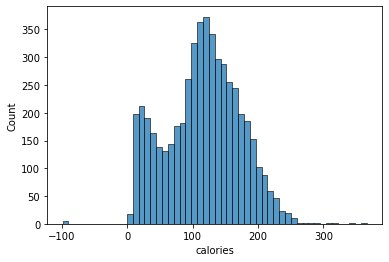

In [41]:
sns.histplot( df_cookies["calories"])

<AxesSubplot:xlabel='sugar index', ylabel='Count'>

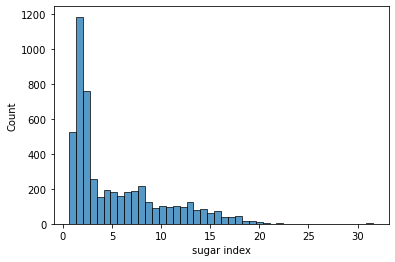

In [12]:
sns.histplot(data=df_cookies, x="sugar index")

<AxesSubplot:xlabel='bake time', ylabel='Count'>

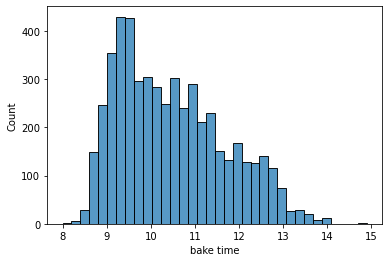

In [13]:
#plot histogram baketime:"bake time"
sns.histplot(data=df_cookies, x="bake time")

In [14]:
df_cookies["bake time"].mean()

10.494757774346976

<AxesSubplot:xlabel='butter type', ylabel='Count'>

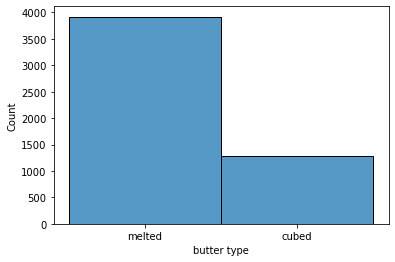

In [15]:
#plot histogram butter type
sns.histplot(data=df_cookies, x="butter type")

In [16]:
df_cookies["diameter"].unique()
df_cookies["diameter"].unique()
df_cookies["diameter"].unique()
df_cookies["diameter"].unique()
df_cookies["diameter"].unique()
df_cookies["diameter"].unique()

array([7])

In [17]:
# drop stuff:
#diameter: the whole column, it has zero std dev.



Columns or rows to drop:

Diameter column

Drop rows with nans in the mixins column

Impute bake_time with mean

Impute sugar_index with the mode

One_hot encode butter_type and mixins

Drop chill time


In [ ]:
#dropping diameter becuase it has no sdt dev, all values are the same:
df_cookies.drop(columns="diameter", inplace=True)

In [32]:
# drop rows with nans in column mixins
df_cookies.dropna(how='any', subset=['mixins'], inplace=True)

In [33]:
#dropping chill time, because it is highly correlated with calories:
df_cookies.drop(columns="chill time", inplace=True)

In [4]:
def dropping_rows_and_columns(df):
    '''
    dropping diameter becuase it has no sdt dev, all values are the same
    drop rows with nans in column mixins
    dropping chill time, because it is highly correlated with calories
    '''
    df.drop(columns="diameter", inplace=True)
    df.dropna(how='any', subset=['mixins'], inplace=True)
    df.drop(columns="chill time", inplace=True)
    return df

In [5]:
dropping_rows_and_columns(df_cookies)

,sugar to flour ratio,sugar index,bake temp,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,3
1,0.23,3.3,520,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,3
2,0.18,1.9,360,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,3
3,0.18,10.5,490,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,3
4,0.24,2.4,770,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,peanut butter,1.36,3
5194,0.16,1.5,490,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,raisins,1.80,3
5195,0.25,14.3,480,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,"chocolate, oats",1.07,3
5196,0.33,1.4,560,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,chocolate,1.77,3


In [ ]:
#One_hot encode butter_type and mixins

In [7]:
# butter type
df_cookies["butter type"].unique()

array(['melted', 'cubed'], dtype=object)

In [16]:
df_cookies["mixins"].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', 'peanut butter, raisins', 'oats'], dtype=object)

In [15]:
len(df_cookies["mixins"].unique())

13

In [ ]:
list[]
# concat 5 columns with same name and fill it with 0

for vals in df_cookies["mixins"]:
    x = list(vals)
    for i in x:
        df_cookies[i].loc

In [12]:
import numpy as np
import pandas as pd


def mixin_fixer(df):
    ingredients = ['raisins', 'nuts', 'oats', 'chocolate','peanut butter']
    #create columns for each ingredient
    df[ingredients]=np.nan
    #fill them with zeros
    df.fillna(0)
    for x in ingredients:
        df[x]=df["mixins"].str.contains(x).astype(float)
    return df

In [13]:
mixin_fixer(df_cookies)

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,weight,diameter,mixins,crunch factor,aesthetic appeal,raisins,nuts,oats,chocolate,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,15.2,7,raisins,1.30,3,1.0,0.0,0.0,0.0,0.0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,12.4,7,raisins,1.71,3,1.0,0.0,0.0,0.0,0.0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,9.4,7,"nuts, chocolate",1.78,3,0.0,1.0,0.0,1.0,0.0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,12.2,7,chocolate,1.59,3,0.0,0.0,0.0,1.0,0.0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,19.8,7,"nuts, oats, chocolate",1.30,3,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,...,11.6,7,peanut butter,1.36,3,0.0,0.0,0.0,0.0,1.0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,...,10.0,7,raisins,1.80,3,1.0,0.0,0.0,0.0,0.0
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,...,13.4,7,"chocolate, oats",1.07,3,0.0,0.0,1.0,1.0,0.0
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,...,13.8,7,chocolate,1.77,3,0.0,0.0,0.0,1.0,0.0


In [9]:

# Your code here



,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,weight,diameter,mixins,crunch factor,aesthetic appeal,raisins,nuts,oats,chocolate,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,15.2,7,raisins,1.30,3,1.0,0.0,0.0,0.0,0.0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,12.4,7,raisins,1.71,3,1.0,0.0,0.0,0.0,0.0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,9.4,7,"nuts, chocolate",1.78,3,0.0,1.0,0.0,1.0,0.0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,12.2,7,chocolate,1.59,3,0.0,0.0,0.0,1.0,0.0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,19.8,7,"nuts, oats, chocolate",1.30,3,0.0,1.0,1.0,1.0,0.0


In [21]:

for i in df_cookies["mixins"]:
    if "raisins" in i
    df_test["raissins"]=1    
        if "chocolate"in i
        
    if i=="nuts":
        df_cookies["nuts"]=1
    if i=="chocolate":
        

SyntaxError: EOL while scanning string literal (<ipython-input-21-377cad838233>, line 3)

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def one_hot_tranformer():
    #columns to apply one hote necoding:
    oneHot_cols = ["butter type", "mixins"]
    #initialize encoder
    oneH = OneHotEncoder()

    categ_encode_pipeline = ColumnTransformer([
        ("oneH_encoder_branch", oneH, oneHot_cols)])
    return categ_encode_pipeline

In [20]:
one_hot_tranformer()

ColumnTransformer(transformers=[('oneH_encoder_branch', OneHotEncoder(),
                                 ['butter type', 'mixins'])])

In [20]:
# defining X and y
X = df_cookies.drop(columns="quality")
y = df_cookies["quality"]
# splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [25]:

from sklearn.preprocessing import StandardScaler
scaler = FunctionTransformer(StandardScaler)

In [26]:
scaler.fit_transform (X_train)

/home/nuria/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass copy=      sugar to flour ratio  sugar index  bake temp  chill time  calories  \
3720                  0.39        16.10        530        71.0     194.0   
3928                  0.32         1.30        480        59.0     113.0   
2700                  0.40         3.60       1100        12.0      24.0   
847                   0.26         1.60        270        36.0     141.0   
2088                  0.02         1.90        780        18.0      30.0   
...                    ...          ...        ...         ...       ...   
2181                  0.30         3.85        420       105.0     179.0   
2409                  0.33         4.60        340        19.0      80.0   
2033                  0.51         2.60        520        13.0      27.0   
1364                  0.26         2.30        900        23.0      74.0   
4547                  0.26         1.90        790       

StandardScaler(copy=      sugar to flour ratio  sugar index  bake temp  chill time  calories  \
3720                  0.39        16.10        530        71.0     194.0   
3928                  0.32         1.30        480        59.0     113.0   
2700                  0.40         3.60       1100        12.0      24.0   
847                   0.26         1.60        270        36.0     141.0   
2088                  0.02         1.90        780        18.0      30.0   
...                    ...          ...        ...         ...       ...   
2181                  0.30         3.85        420       105.0     179.0   
2409                  0.33         4.60        340        19.0      80.0   
2033                  0.51         2.60        520        13.0      27.0   
1364                  0.26         2.30        900        23.0      74.0   
4547                  0.26         1.90        790        42.0     140.0   

      density    pH  grams baking so...
2033  0.99500  8.32        

In [ ]:
df_cookies["mixins"].